In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train /255
x_test = x_test /255

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


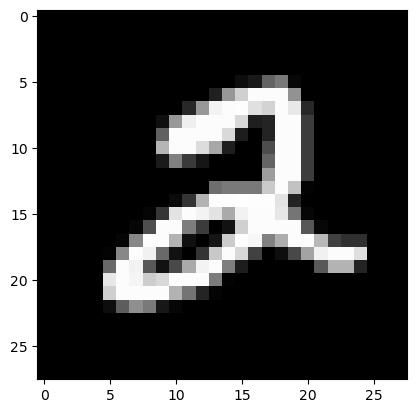

In [4]:
plt.imshow(x_train[5], cmap='grey')

In [5]:
model = tf.keras.models.Sequential([
    layers.InputLayer(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_l = model.fit(x_train, y_train, epochs=10, batch_size=128 ,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.7005 - val_accuracy: 0.9349 - val_loss: 0.2344
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9340 - loss: 0.2226 - val_accuracy: 0.9516 - val_loss: 0.1738
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9515 - loss: 0.1590 - val_accuracy: 0.9579 - val_loss: 0.1450
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9631 - loss: 0.1246 - val_accuracy: 0.9589 - val_loss: 0.1362
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9694 - loss: 0.1036 - val_accuracy: 0.9652 - val_loss: 0.1175
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.0868 - val_accuracy: 0.9658 - val_loss: 0.1126
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0765 - val_accuracy: 0.9696 - val_loss: 0.1005
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.

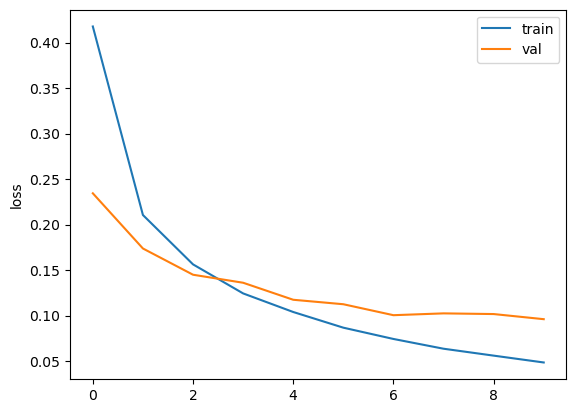

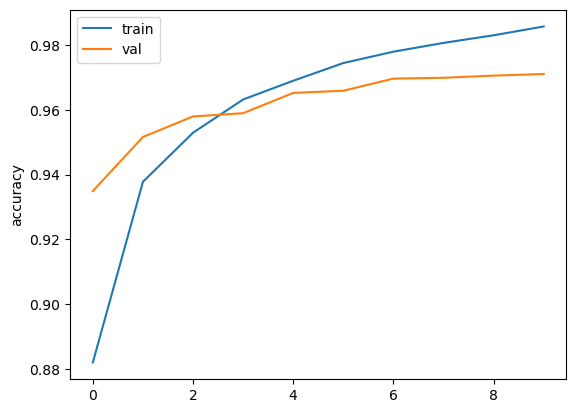

In [7]:
plt.plot(history_l.history['loss'], label = 'train')
plt.plot(history_l.history['val_loss'], label = 'val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_l.history['accuracy'], label = 'train')
plt.plot(history_l.history['val_accuracy'], label = 'val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9669 - loss: 0.1013


[0.08667030930519104, 0.9726999998092651]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
==> 7


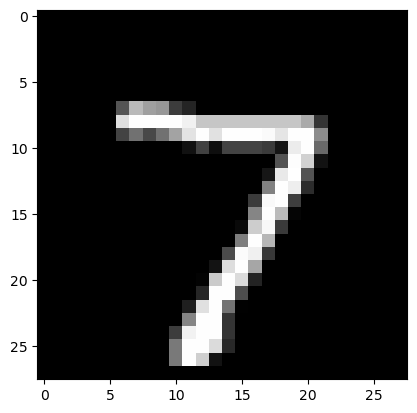

==> 2


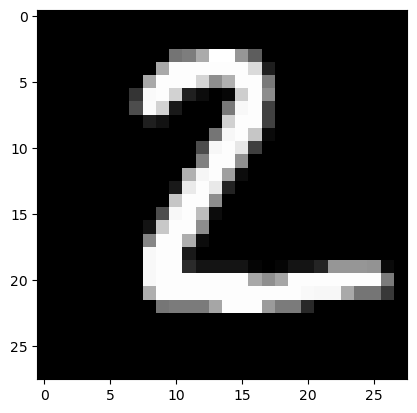

==> 1


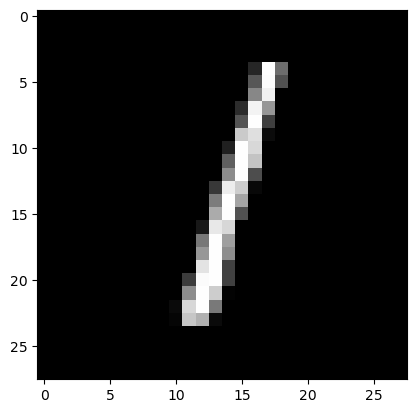

==> 0


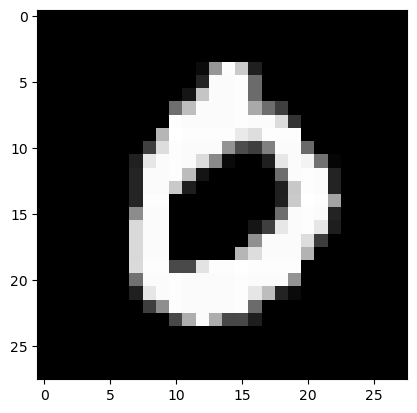

==> 4


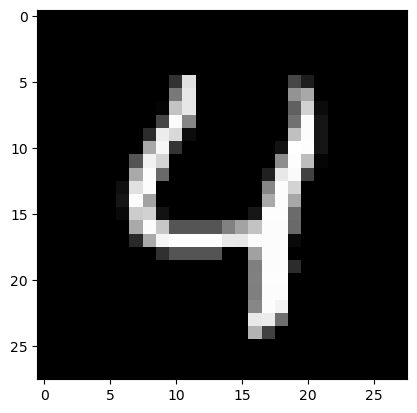

In [20]:
prob = model.predict(x_test[:5])
pred = np.argmax(prob, axis=1)

for i in range(5):
    print("==>", pred[i])
    plt.imshow(x_test[i], cmap='gray')
    plt.show()